In [1]:
import chipwhisperer as cw

In [2]:
scope= cw.scope()

In [3]:
scope.default_setup()
 # Setup sane defaults for clock, IO, etc.
target = cw.target(scope, cw.targets.SimpleSerial)


In [4]:
%%sh
cd 'C:/Users/admin/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/simpleserial-present/'
make PLATFORM=CWLITEARM CRYPTO_TARGET=PRESENT

Building for platform CWLITEARM with CRYPTO_TARGET=PRESENT
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
Building for platform CWLITEARM with CRYPTO_TARGET=PRESENT
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
make[1]: '.dep' is up to date.
Building for platform CWLITEARM with CRYPTO_TARGET=PRESENT
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    simpleserial-present.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compiling:
    .././hal/stm32f3/stm32f3_hal.c ...Done!


In [5]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "C:/Users/admin/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/simpleserial-present/simpleserial-present-CWLITEARM.hex")


Detected unknown STM32F ID: 0x446
Extended erase (0x44), this can take ten seconds or more
Attempting to program 5515 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 5515 bytes


In [7]:
key = bytearray([0x01] * 10)
target.simpleserial_write('k', key)


In [8]:
import numpy as np
num_traces = 15000
plaintexts = [bytearray(np.random.bytes(8)) for _ in range(num_traces)]  # 64-bit PTs
traces = []
ciphertexts = []

for pt in plaintexts:
    scope.arm()

    # Send plaintext
    target.simpleserial_write('p', pt)

    # Wait for trigger and capture trace
    ret = scope.capture()
    if ret:
        print("Capture timed out!")
        continue

    # Get power trace
    trace = scope.get_last_trace()
    traces.append(trace)

    # Read ciphertext
    ct = target.simpleserial_read('r', 8)
    ciphertexts.append(bytes(ct))

print(f"Captured {len(traces)} traces.")

Captured 15000 traces.


In [9]:
traces

[array([ 0.04394531, -0.09179688, -0.05859375, ..., -0.08300781,
         0.03710938,  0.09667969]),
 array([ 0.04394531, -0.09277344, -0.05957031, ..., -0.0859375 ,
         0.03808594,  0.1015625 ]),
 array([ 0.04492188, -0.09179688, -0.05761719, ..., -0.08203125,
         0.0390625 ,  0.09863281]),
 array([ 0.04296875, -0.09179688, -0.05761719, ..., -0.08691406,
         0.0390625 ,  0.10253906]),
 array([ 0.04101562, -0.09472656, -0.06054688, ..., -0.08789062,
         0.03613281,  0.09960938]),
 array([ 0.04394531, -0.08984375, -0.05761719, ..., -0.08398438,
         0.03808594,  0.09863281]),
 array([ 0.04492188, -0.08886719, -0.05761719, ..., -0.08886719,
         0.0390625 ,  0.10058594]),
 array([ 0.04199219, -0.09472656, -0.0625    , ..., -0.08496094,
         0.04101562,  0.10351562]),
 array([ 0.04394531, -0.08984375, -0.05761719, ..., -0.08496094,
         0.04003906,  0.10253906]),
 array([ 0.04296875, -0.08886719, -0.05761719, ..., -0.08105469,
         0.03613281,  0.09

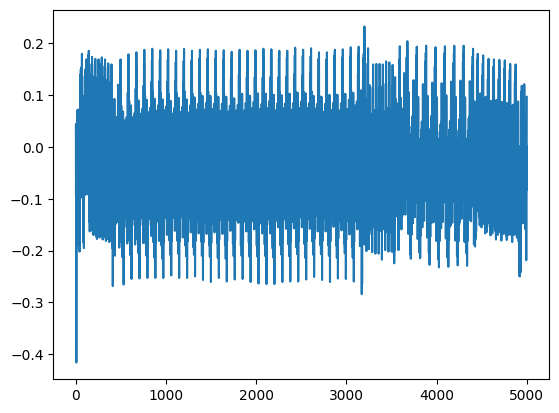

In [10]:
import matplotlib.pyplot as plt
plt.plot(traces[0])

In [11]:
ciphertexts

[b'\xa7\x0c\x9bu\xc4\xef#{',
 b'\xd4k<\xe4\xdd\xb2\x15\x95',
 b'\xa4\xc1\xdb\x0bP\xbcO@',
 b'i\x95e\xab\xbb\xfc\xd5~',
 b"\xdf\x1e\xc0\x8d\x05\xf0y'",
 b'\xcb\x111\x92\x9e\x06\xc0\xcd',
 b'\x1e\x91\x9e\xfd!\x8fQF',
 b'\x7f\x89\xcf\n\xc4\xca\xbe\xb7',
 b'\xd7\xe1\xa5J\x0b\xf1\x0f\xee',
 b'Q;e\x9c\x8b\xa2\x8b\x97',
 b'\x1b\x96\x80\x9e\xce\x839\x95',
 b'\xdbQ\xee\xb2\x17\xbb\x9fD',
 b'`\xcdSE\x9akV\x11',
 b'_l\xa8/z\x84\x95\xba',
 b'\xa4\xdbG\x87\xcf\xb3\x18e',
 b'\x06\x14\x84\x9a\xa4\xfdaz',
 b'\xbaLv\x9a<\x0c\x1e\x90',
 b'\x8b\xd2W\xc3#\x96\x91\xa9',
 b'\xd7\xdf\xdb\xaeYL\xc1\xdb',
 b'\x11b.j\x8b\x8f\xef\x05',
 b'\xa3%2\xee\xce9k\x9a',
 b'4\x1bz\x877\xaf\xcb#',
 b"\xcf\xe7n\\'aC\xed",
 b'j!#\xda!@|\xeb',
 b'8\x86\xb0mU\xf0\x86d',
 b'\xd0bz@,U^0',
 b'\xd8Y}\xa5\xd4\x0e%\x97',
 b'!\tJp]L\xd1\xf4',
 b'\xe2\x88\xf8\x08\xf42\xdb\x15',
 b'\x9bY\xed`\xc9\xee\x8f=',
 b'\x8d\x13fHm\x00D\xc1',
 b'd\xb2\xd1\xb8$J\x17`',
 b'\xcc\xdb\x1e!\xdd\x8c\x94\xe3',
 b",\xc6\xc2A\x1c'/\xaf",
 b'\xd8x\xf5\xb7P

In [12]:
plaintexts

[bytearray(b'\xefM\xef>\x1e\x9dG&'),
 bytearray(b'\xd5\xf9!\x95;\x936\xfa'),
 bytearray(b';\x1f\x96\x18~\xf1\x07\xff'),
 bytearray(b'\x16\xd4\x01U\xaf\x92\x87\x85'),
 bytearray(b',\xae\x02\xcb\x00(W\x89'),
 bytearray(b'\x1f>\xe9\xec2\xf9}\x10'),
 bytearray(b'\t\xd4\xaeF\xd7\xf9\xd2\xb1'),
 bytearray(b'\nnf%6\x81,>'),
 bytearray(b'\xcbE\xd6~\x95\xbc\x82\xf2'),
 bytearray(b'\xdf\x7f\xcf\xc5Z\x87\xbe{'),
 bytearray(b'\x1c\xc6\x03,\t\x87\n\x02'),
 bytearray(b'w\x10E\x1d\x19J\x14\x0c'),
 bytearray(b'\x1e\x97b:bh\xe4\xca'),
 bytearray(b'F@|\xda\xfc\xc3`\xc1'),
 bytearray(b'\xe8\x05\x8a,\xdd\xac\x8e\xbb'),
 bytearray(b'\xc7\xe0\x95X\xe5}Y\xfc'),
 bytearray(b'\x0b\xcd\xd5t\xdf~\x0f1'),
 bytearray(b'\x82\xf2\xea\xa9C\x951Y'),
 bytearray(b'\xe3G\x88\xf2\xee-\xe1\xb9'),
 bytearray(b'\x1a\xc2hI\x89\xf7\xb8g'),
 bytearray(b'\x97\xbf\xc1\xe0\xbe3\xe8k'),
 bytearray(b'\x00\x0e\x8f\xfdn\xef0\x88'),
 bytearray(b'M0:\x90\x91\n\x1a\x0c'),
 bytearray(b'8\xf7\xf2\xd4x\x1d\x02d'),
 bytearray(b'\x87\x0eZ\x85

In [13]:
def convert_to_hex(byte_arrays):
    # Convert each byte array to a hex string and return the list of hex strings
    return [bytes_array.hex() for bytes_array in byte_arrays]

In [14]:
plain= convert_to_hex(plaintexts)
plain

['ef4def3e1e9d4726',
 'd5f921953b9336fa',
 '3b1f96187ef107ff',
 '16d40155af928785',
 '2cae02cb00285789',
 '1f3ee9ec32f97d10',
 '09d4ae46d7f9d2b1',
 '0a6e662536812c3e',
 'cb45d67e95bc82f2',
 'df7fcfc55a87be7b',
 '1cc6032c09870a02',
 '7710451d194a140c',
 '1e97623a6268e4ca',
 '46407cdafcc360c1',
 'e8058a2cddac8ebb',
 'c7e09558e57d59fc',
 '0bcdd574df7e0f31',
 '82f2eaa943953159',
 'e34788f2ee2de1b9',
 '1ac2684989f7b867',
 '97bfc1e0be33e86b',
 '000e8ffd6eef3088',
 '4d303a90910a1a0c',
 '38f7f2d4781d0264',
 '870e5a8584f2222e',
 'd5ad630b816065fe',
 '09320827e062d1d3',
 '3b0611915ecf185b',
 'd8fd94a45abd626d',
 '2a94f83a8f17649e',
 '39256ef97fb1b30d',
 '48685ef8cfa5849c',
 '8cfd71972159d0ab',
 '51fa3ce6a31b23f5',
 '3a58193bcad4bb06',
 '40d35694ed04d735',
 '760def86f2e11199',
 'f4e287129e664cc9',
 '95f50876b47f29e2',
 '023990f69fb02ca5',
 '08d2dc73f497e8d0',
 '2c0b65b4fe8c94bf',
 'a613620c13523fb6',
 '3d38e6251e3e38b5',
 'cbe84db6b84daee9',
 '191ac6ca2e42202f',
 'a8440a450fda3468',
 '104671a932f

In [15]:
cipher= convert_to_hex(ciphertexts)
cipher

['a70c9b75c4ef237b',
 'd46b3ce4ddb21595',
 'a4c1db0b50bc4f40',
 '699565abbbfcd57e',
 'df1ec08d05f07927',
 'cb1131929e06c0cd',
 '1e919efd218f5146',
 '7f89cf0ac4cabeb7',
 'd7e1a54a0bf10fee',
 '513b659c8ba28b97',
 '1b96809ece833995',
 'db51eeb217bb9f44',
 '60cd53459a6b5611',
 '5f6ca82f7a8495ba',
 'a4db4787cfb31865',
 '0614849aa4fd617a',
 'ba4c769a3c0c1e90',
 '8bd257c3239691a9',
 'd7dfdbae594cc1db',
 '11622e6a8b8fef05',
 'a32532eece396b9a',
 '341b7a8737afcb23',
 'cfe76e5c276143ed',
 '6a2123da21407ceb',
 '3886b06d55f08664',
 'd0627a402c555e30',
 'd8597da5d40e2597',
 '21094a705d4cd1f4',
 'e288f808f432db15',
 '9b59ed60c9ee8f3d',
 '8d1366486d0044c1',
 '64b2d1b8244a1760',
 'ccdb1e21dd8c94e3',
 '2cc6c2411c272faf',
 'd878f5b7507b6ea1',
 'b3a0304367a3ddef',
 '1b9857b2e27e799b',
 'ee90ec9f30a77aa2',
 'a2d905b78d8be8dd',
 '28e2bfb4ab29581e',
 '6a1ad95e465b4fe2',
 '87f0dfbae03b57ea',
 'a791131a4d4e3b52',
 'ede057548691852b',
 '22930b637b737ae9',
 '04f36ada112bf95b',
 '05efd5d3ac061fa5',
 '865bdffede8

In [16]:
def final_convert(hex_strings):
    return np.array([list(bytes.fromhex(h)) for h in hex_strings], dtype=np.uint8)

In [17]:
plain_text=final_convert(plain)
plain_text

array([[239,  77, 239, ..., 157,  71,  38],
       [213, 249,  33, ..., 147,  54, 250],
       [ 59,  31, 150, ..., 241,   7, 255],
       ...,
       [213,  78,  16, ...,  38, 106,  38],
       [167,   7, 136, ..., 184,   1, 220],
       [143,  53, 100, ...,  83, 193,  95]], dtype=uint8)

In [18]:
cipher_text= final_convert(cipher)
cipher_text

array([[167,  12, 155, ..., 239,  35, 123],
       [212, 107,  60, ..., 178,  21, 149],
       [164, 193, 219, ..., 188,  79,  64],
       ...,
       [ 38, 224, 127, ..., 206, 190, 210],
       [180,  94, 159, ...,  21,  32, 173],
       [224, 228, 204, ..., 229,  49, 115]], dtype=uint8)

In [19]:
np.save("present_plain1.npy",plain_text)

In [20]:
np.save("present_cipher1.npy",cipher_text)

In [21]:
np.save("present_traces1.npy",traces)

In [22]:
p=np.load('present_plain.npy')
p

array([[223,  59,  52, ..., 183,  13,  47],
       [  7, 204,  78, ...,  67,  26, 133],
       [233, 177,  44, ..., 138, 209, 244],
       ...,
       [178, 160, 194, ..., 247, 185, 153],
       [ 89,  30, 232, ...,  16,  64, 116],
       [ 23, 101,  49, ..., 161, 155, 172]], dtype=uint8)

In [23]:
scope.dis()
target.dis()